# 1. Minimum database configuration
- A project must have a database folder, graphml files, and a json data

- "database" folder
    - "exp1.graphml"
        - Actual graph data
        ![graph](images/graph.png) 
    - "lot_keywords.json"
        - You can use "keywords" in the graph data, by refering this json file
        ![json](images/json.png) 

# Initialize module

In [30]:
#add library path if necessary
import sys
sys.path.append("../../FlowMater/")

#load module
from ExperimentManager import ExperimentManager

In [31]:
# automatically load and parse data in the database folder

#path to the database folder (you can use wild cards, such as *)
base_path="database/*"

#path to the keyword file
json_path="database/lot_keywords.json"

#load graph data
experiment_manager = ExperimentManager(base_path=base_path,json_path=json_path)
%time experiment_manager.auto_load()

begin parsing graphml files
Loading graphs
Initiating FP compressor
Calculating features
Wall time: 134 ms


In [32]:
#loaded data are saved as dict
experiment_manager.experiment_dict

{'normal_experiment0': {'type': 'normal_experiment',
  'name': 'normal_experiment',
  'graph': <networkx.classes.digraph.DiGraph at 0x21e80d76f48>,
  'path': 'database\\exp1.graphml',
  'graph_integrated': <networkx.classes.digraph.DiGraph at 0x21e80c4c8c8>}}

In [33]:
#networkX graph object
g=experiment_manager.experiment_dict['normal_experiment0']["graph"]

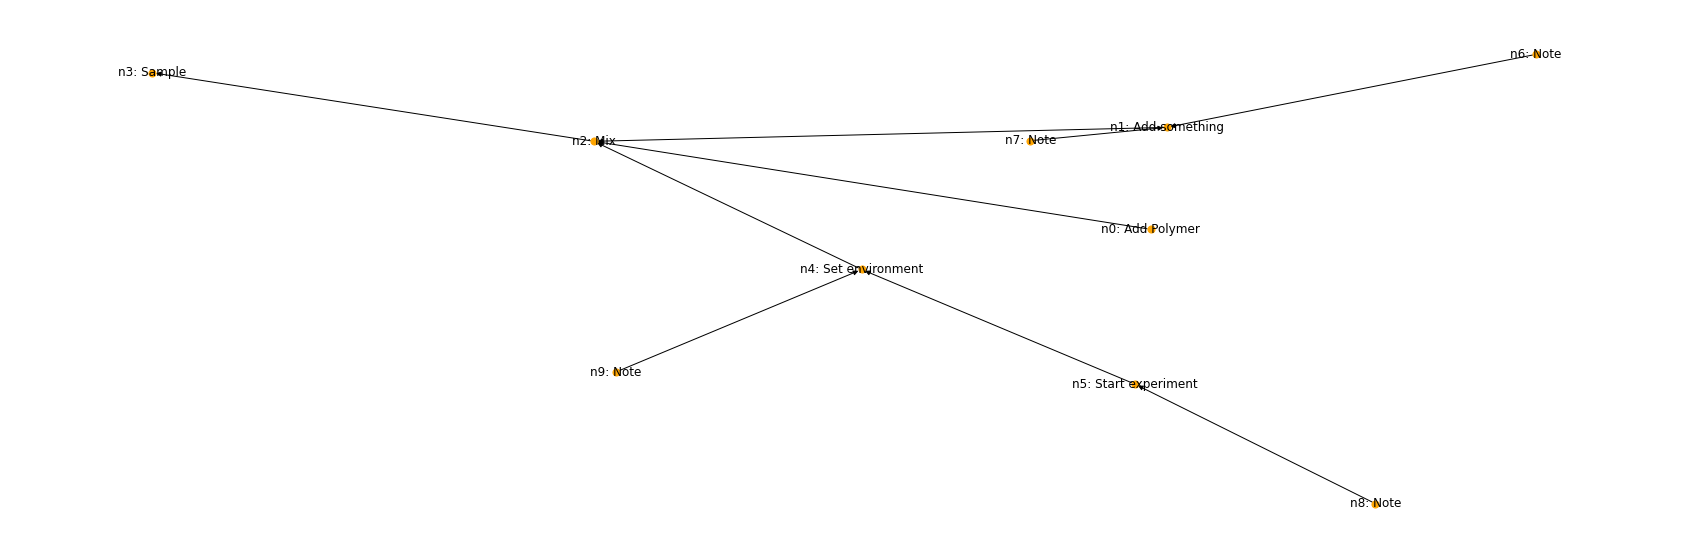

n0 :  Add Polymer
    type :  sample
    weight :  12 mg
    note :  sample A
n1 :  Add something
    type :  sample
    weight :  34 mg
    note :  sample B
n2 :  Mix
    type :  procedure
n3 :  Sample
    type :  sample
n4 :  Set environment
    type :  procedure
    person :  Bob
    Day :  2021/7/26
n5 :  Start experiment
n6 :  Note
    note :  Note  One node consists of "title line"  and "feature information". A feature line should  consist of "feature name": "value"
n7 :  Note
    note :  Note  Use this yellow or  gray boxes as nodes
n8 :  Note
    note :  Note  Clarify the beginning of  the graph (important!)
n9 :  Note
    note :  Note  Notes are normally ignored  during graph processing


In [34]:
#draw graph
from graph_util import draw_graph
draw_graph(g)

In [35]:
#automatically converted dataframe
experiment_manager.dataframe

,FP: Add-Polymer-sample-|Mix-,FP: Add-something-sample-|Mix-,FP: Mix-|Add-Polymer-something-Set-environment,FP: Sample-sample-|Mix-,FP: Set-environment-|Start-experiment-Mix-,FP: Start-experiment-|Set-environment-,"label: Add Polymer, type: sample, <-->Mix","label: Add something, type: sample, <-->Mix","label: Mix, type: procedure, <-->Add Polymer--Add Polymer--Add something--Add something--Sample--Set environment--Set environment","label: Sample, type: sample, <-->Mix--Mix","label: Set environment, type: procedure, <-->Mix--Start experiment--Start experiment","label: Start experiment, <-->Set environment"
normal_experiment0_database\exp1.graphml,1,1,1,1,1,1,1,1,1,1,1,1
